In [40]:
import pandas as pd
import numpy as np

column_names = [
    "user_id",
    "item_id",
    "rating",
    "timestamp",
]

ratings = pd.read_csv(
    "core/data/user_rating.data",
    sep="\t",
    names=column_names,
)

ratings.head()


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [41]:
movies = pd.read_csv(
    "core/data/movies.txt",
)

movies.head()


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [42]:
df = pd.merge(
    ratings,
    movies,
    on="item_id",
)


df.head()


,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline


In [44]:
df.groupby("title")["rating"].mean().sort_values(ascending=False).head()


title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

In [45]:
df.groupby("title")["rating"].count().sort_values(ascending=False).head()


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [46]:
movie_rating = pd.DataFrame(df.groupby("title")["rating"].mean())

movie_rating.head()


,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [47]:
movie_rating["cnt_ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())

movie_rating.head()


,rating,cnt_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: xlabel='cnt_ratings', ylabel='Count'>

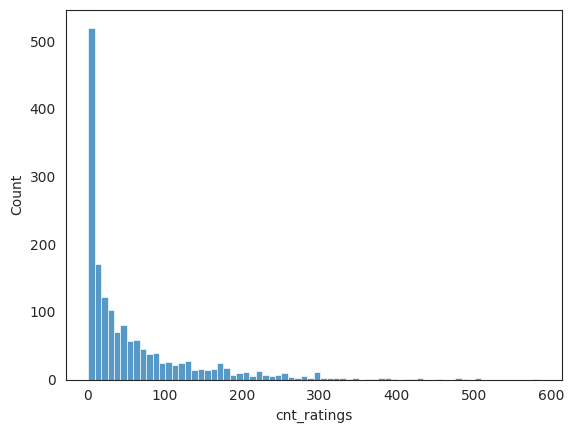

In [48]:
sns.histplot(
    movie_rating["cnt_ratings"],
    bins=70,
)


<Axes: xlabel='rating', ylabel='Count'>

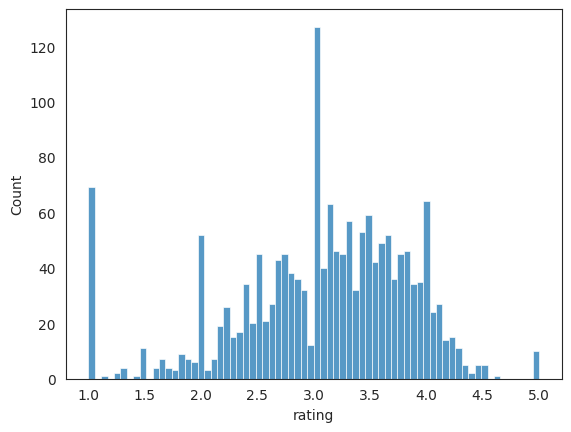

In [49]:
sns.histplot(movie_rating["rating"], bins=70)


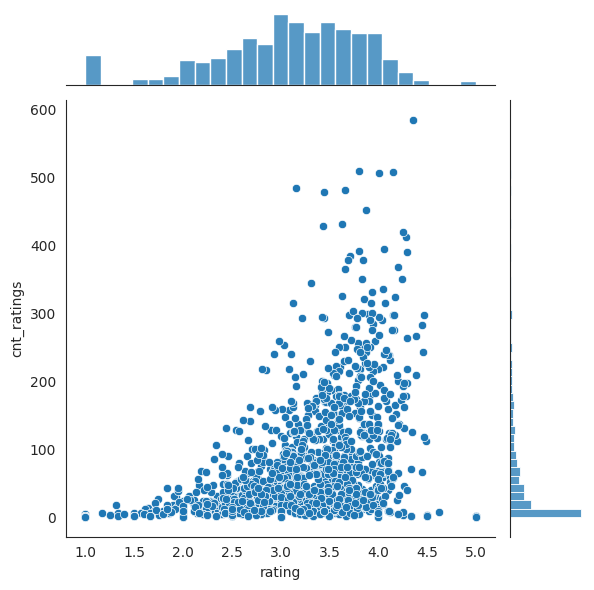

In [50]:
sns.jointplot(
    movie_rating,
    x="rating",
    y="cnt_ratings",
)


In [51]:
movie_matrix = df.pivot_table(
    index="user_id",
    columns="title",
    values="rating",
)

movie_matrix.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# movie_rating.sort_values("cnt_ratings", ascending=False).head()


starwars_u_ratings = movie_matrix["Star Wars (1977)"]
fargo_u_ratings = movie_matrix["Fargo (1996)"]

starwars_u_ratings.head()


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [53]:
starwars_similar = movie_matrix.corrwith(starwars_u_ratings)
fargo_similar = movie_matrix.corrwith(fargo_u_ratings)


print(fargo_similar)


/home/mrmauler/DRIVE/projects/dl/recommend_movies/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mrmauler/DRIVE/projects/dl/recommend_movies/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/mrmauler/DRIVE/projects/dl/recommend_movies/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/mrmauler/DRIVE/projects/dl/recommend_movies/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/mrmauler/DRIVE/projects/dl/recommend_movies/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *

title
'Til There Was You (1997)                0.100000
1-900 (1994)                             0.866025
101 Dalmatians (1996)                   -0.245368
12 Angry Men (1957)                      0.098676
187 (1997)                               0.142509
                                           ...   
Young Guns II (1990)                    -0.018688
Young Poisoner's Handbook, The (1995)   -0.034345
Zeus and Roxanne (1997)                 -0.353553
unknown                                 -0.101768
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64


In [54]:
starwars_corr = pd.DataFrame(starwars_similar, columns=["Correlation"])
starwars_corr.dropna(inplace=True)
starwars_corr.sort_values("Correlation", ascending=False).head()


,Correlation
title,
Star Wars (1977),1.0
Stripes (1981),1.0
Hollow Reed (1996),1.0
Man of the Year (1995),1.0
Cosi (1996),1.0


In [55]:
starwars_corr = starwars_corr.join(movie_rating["cnt_ratings"])

starwars_corr.head()


,Correlation,cnt_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [60]:
starwars_corr[starwars_corr["cnt_ratings"] > 100].sort_values(
    "Correlation",
    ascending=False,
).head()


,Correlation,cnt_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [66]:
fargo_corr = pd.DataFrame(fargo_similar, columns=["Correlation"])
fargo_corr.dropna(inplace=True)
fargo_corr = fargo_corr.join(movie_rating["cnt_ratings"])
fargo_corr[fargo_corr["cnt_ratings"] > 100].sort_values(
    "Correlation",
    ascending=False,
).head(10)


,Correlation,cnt_ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
True Romance (1993),0.345781,104
Raging Bull (1980),0.344163,116
"People vs. Larry Flynt, The (1996)",0.341784,215
"Magnificent Seven, The (1954)",0.338462,121
